<a href="https://colab.research.google.com/github/poppath5/Popstudypython/blob/master/AibanbanTF2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

TensorFlow 2.x selected.


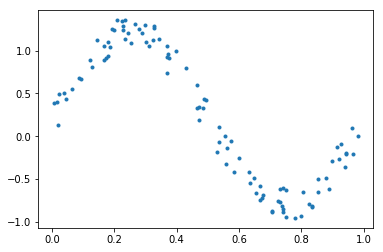

In [ ]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.plot(X, Y, '.')
plt.show()

In [ ]:
def relu(x):
  return tf.where(x>=0, x, 0)

class MLP():
  def __init__(self, neurons=[1, 100, 100, 1], activation=[relu, relu, None]):
    self.W = []
    self.activation = activation
    for i in range(1, len(neurons)):
      self.W.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i]))) # W
      self.W.append(tf.Variable(np.random.randn(neurons[i]))) # b
  def __call__(self, x):
    for i in range(0, len(self.W), 2):
      x = x @ self.W[i] + self.W[i+1]
      if self.activation[i // 2] is not None:
        x = self.activation[i // 2](x)
    return x
  def fit(self, X, Y, lr=0.0001, epochs=2000):
    for epoch in range(epochs):
      with tf.GradientTape() as t:
        loss = tf.reduce_mean((self(X) - Y)**2)
      dW = t.gradient(loss, self.W)
      for i, W in enumerate(self.W):
        W.assign_sub(lr * dW[i])
      if epoch % 1000 == 0:
        print(epoch, loss.numpy())

In [ ]:
lr = 0.0001
model = MLP()
model.fit(X, Y, lr, 7000)

0 649.3587702460893
1000 0.04434745877226532
2000 0.023074070071859416
3000 0.016635151238940687
4000 0.014187867255871784
5000 0.013051462708241838
6000 0.012486314639783393


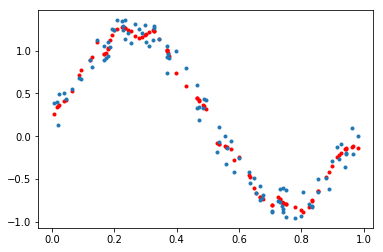

In [ ]:
Z = model(X)
plt.plot(X, Z, '.r')
plt.plot(X, Y, '.')
plt.show()

In [ ]:
# XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0, 1, 1, 0]]).T

In [ ]:
model = MLP(neurons=[2, 100, 100, 1], activation=[relu, relu, None])
model.fit(X, Y)

0 6463.431220520953
1000 1.333667967889273e-28


In [ ]:
tf.round(model(X)).numpy()

array([[0.],
       [1.],
       [1.],
       [0.]])

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
itrain = []
itest = []
X = df.iloc[:, :4].values
L = df.iloc[:, -1].values
classes = np.unique(L)
split = 0.5
Y = []
for c in classes:
  Idx = L == c
  idx = np.where(Idx)[0]
  sp = int(split * len(idx))
  itrain.extend(idx[:sp])
  itest.extend(idx[sp:])
  Y.append(Idx.astype(np.int)) # one-hot
Y = np.array(Y).T
print(Y)

In [ ]:
model = MLP([4, 100, 50, 3], [tf.sigmoid, tf.sigmoid, tf.sigmoid])
model.fit(X[itrain], Y[itrain], lr=0.1, epochs=5000)

0 0.46776222954254704
1000 0.028669839711566284
2000 0.015055356594355767
3000 0.010602989808286285
4000 0.008969765215776455


In [ ]:
Z = model(X[itest])

In [ ]:
tf.argmax(Z, axis=1)

<tf.Tensor: id=2118320, shape=(75,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [ ]:
tf.argmax(Y[itest], axis=1)

<tf.Tensor: id=2118323, shape=(75,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [ ]:
np.sum(tf.argmax(Y[itest], axis=1) == tf.argmax(Z, axis=1)) / len(itest)

0.9733333333333334